# Census Income
Project Description
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.
Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:
1.	A single cell estimate of the population 16+ for each state.
2.	Controls for Hispanic Origin by age and sex.
3.	Controls by Race, age and sex.
We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('census_income.csv')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' Income'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


- There are fifteen columns out of which six are integer and nine are object columns
- Total number of rows are 32561 in the datasets 

# Statistical Data Analysis

In [5]:
df.isna().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 Income            0
dtype: int64

In [6]:
df.nunique()

age                   73
 workclass             9
 fnlwgt            21648
 education            16
 education-num        16
 marital-status        7
 occupation           15
 relationship          6
 race                  5
 sex                   2
 capital-gain        119
 capital-loss         92
 hours-per-week       94
 native-country       42
 Income                2
dtype: int64

In [7]:
df.describe(include = 'all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


- There is no NaN value present in the data sets 
- Maximum unique values are present with fnlwgt column with 21648 numbers rest of all the columns having unique values are less than 120 
- Outliears are present between capital-gain and capital-loss as there is huge difference between 75% and maximum value 
- Also the considerable difference between men value and 50% value of capital-gain and capital-loss is present tha means sqewness present in the datasets 

In [8]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' Income'],
      dtype='object')

In [9]:
categorical_columns=[' workclass', ' education', ' marital-status', ' occupation',' relationship', ' race', ' sex', ' native-country']
categorical_column=df[{' workclass', ' education', ' marital-status', ' occupation',' relationship', ' race', ' sex', ' native-country'}]

labels count: 
   <=50K    24720
 >50K      7841
Name:  Income, dtype: int64


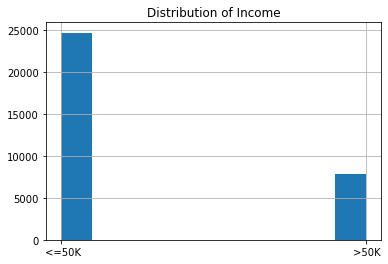

In [10]:
print("labels count: \n ",df[" Income"].value_counts())
df[" Income"].hist(grid=True)
plt.title("Distribution of Income")
plt.show()

<AxesSubplot:xlabel='age', ylabel='count'>

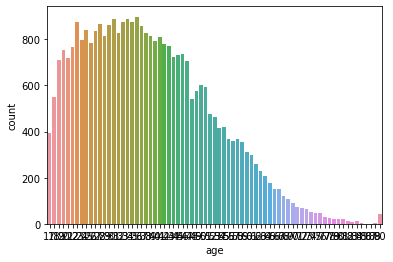

In [11]:
sns.countplot(df['age'], data= df)

---------  workclass vs Income---------------------------------------------------------------------------------


 workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name:  workclass, dtype: int64




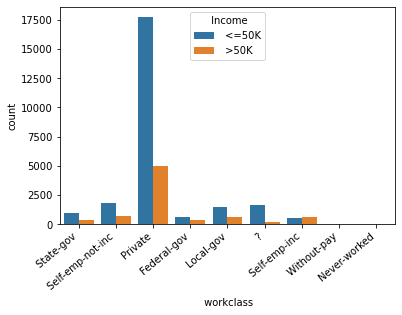

<Figure size 1080x504 with 0 Axes>

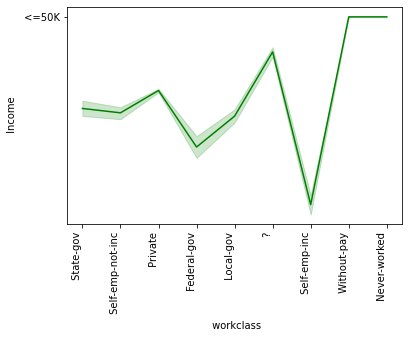

<Figure size 1080x504 with 0 Axes>

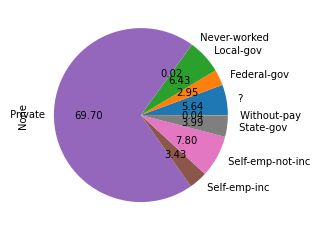

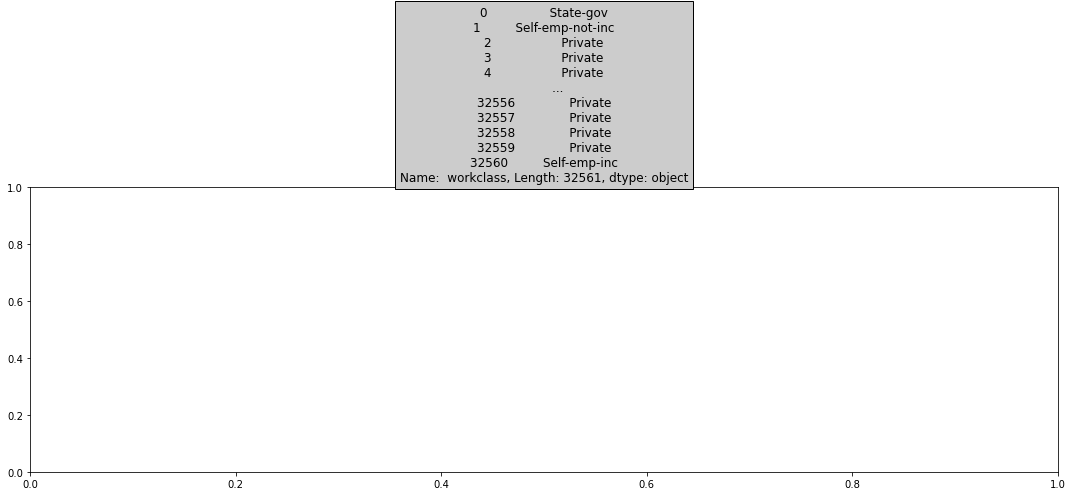

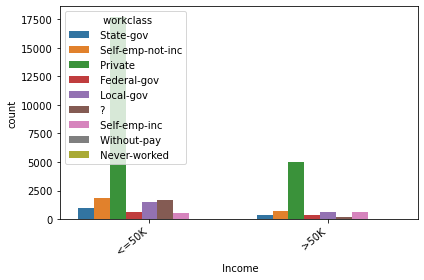



---------  education vs Income---------------------------------------------------------------------------------


 education
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name:  education, dtype: int64




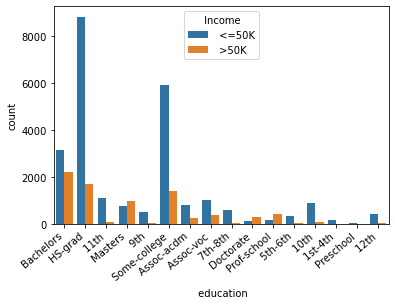

<Figure size 1080x504 with 0 Axes>

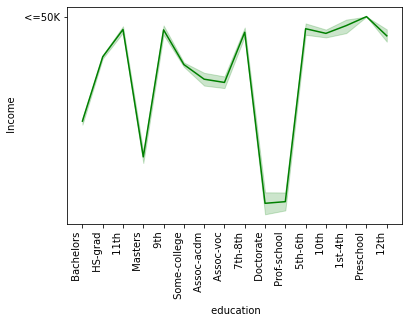

<Figure size 1080x504 with 0 Axes>

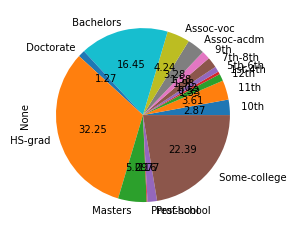

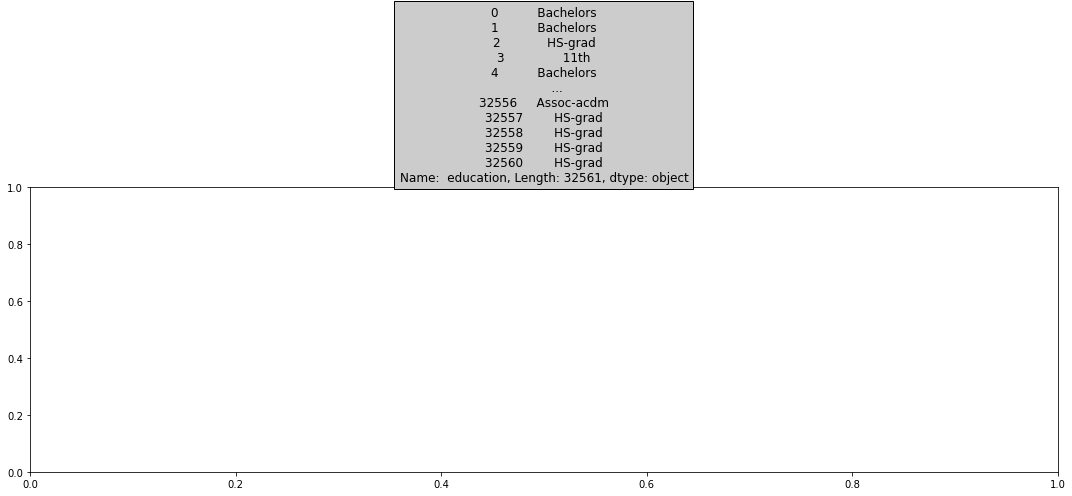

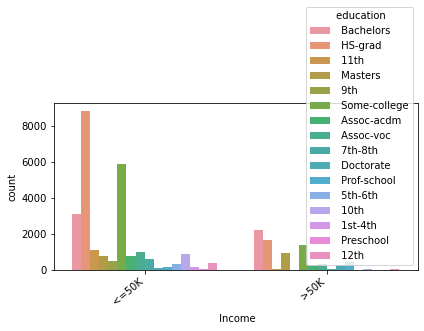



---------  marital-status vs Income---------------------------------------------------------------------------------


 marital-status
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name:  marital-status, dtype: int64




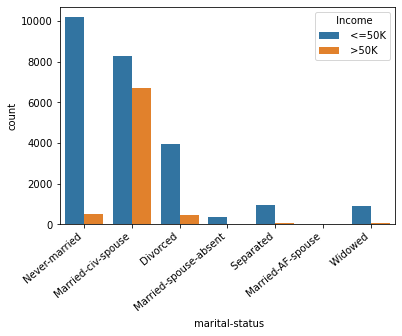

<Figure size 1080x504 with 0 Axes>

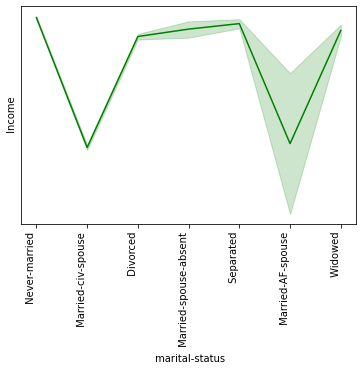

<Figure size 1080x504 with 0 Axes>

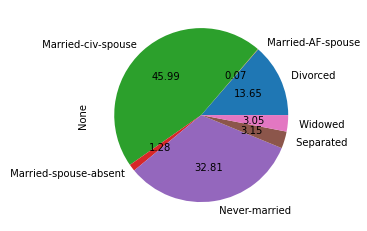

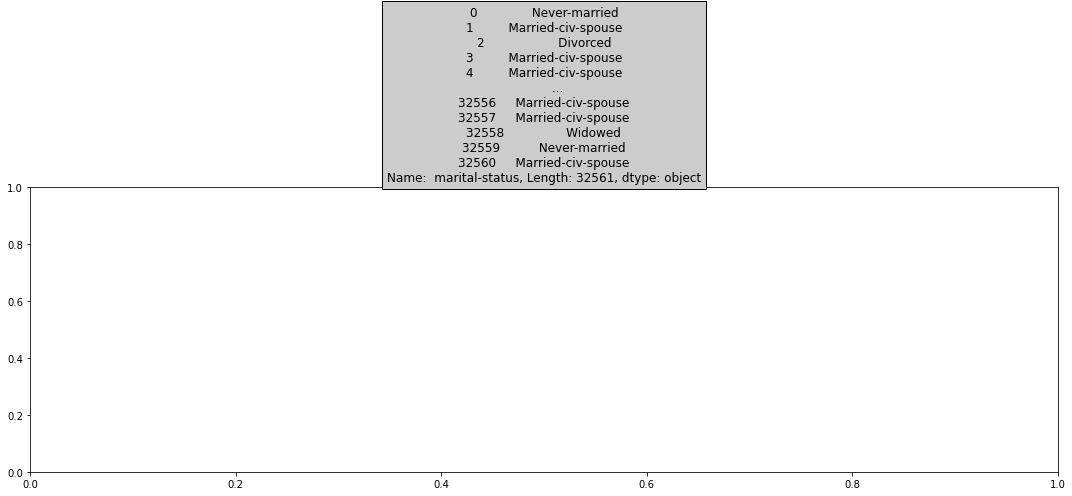

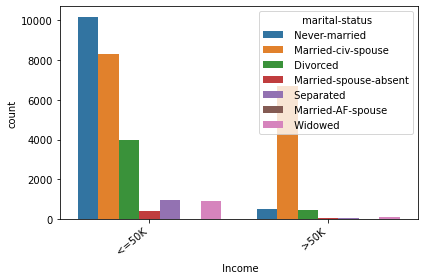



---------  occupation vs Income---------------------------------------------------------------------------------


 occupation
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name:  occupation, dtype: int64




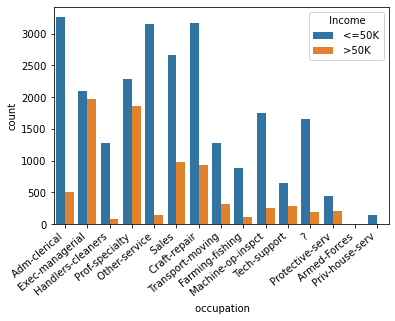

<Figure size 1080x504 with 0 Axes>

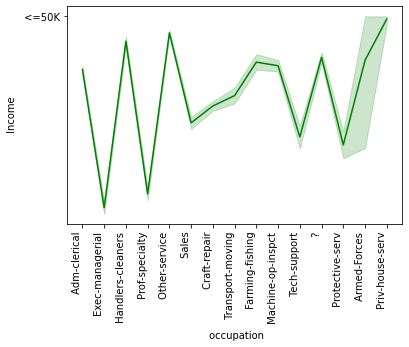

<Figure size 1080x504 with 0 Axes>

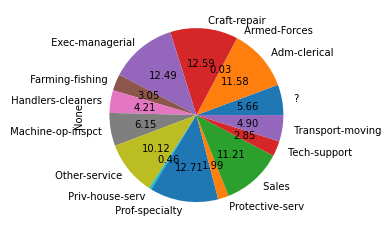

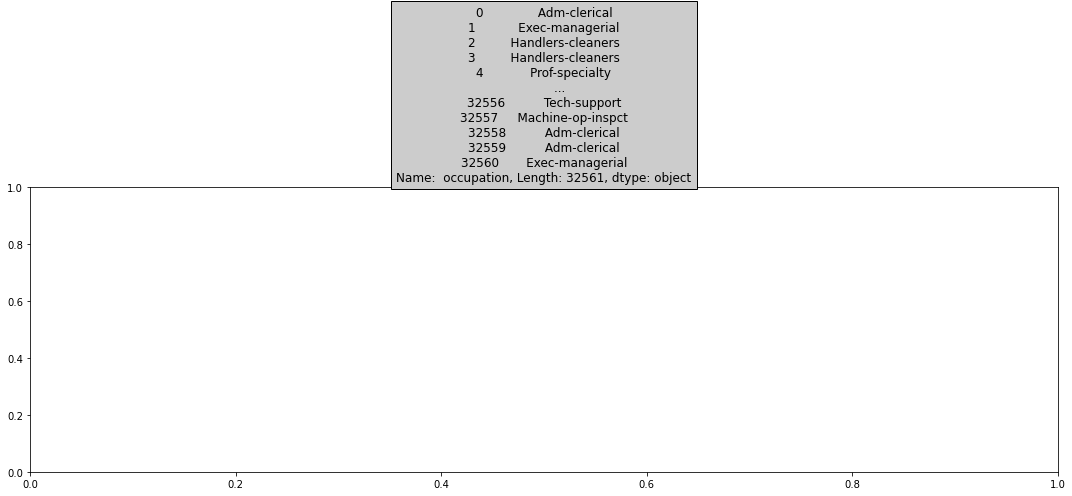

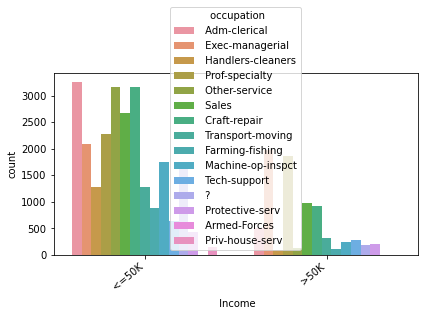



---------  relationship vs Income---------------------------------------------------------------------------------


 relationship
 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name:  relationship, dtype: int64




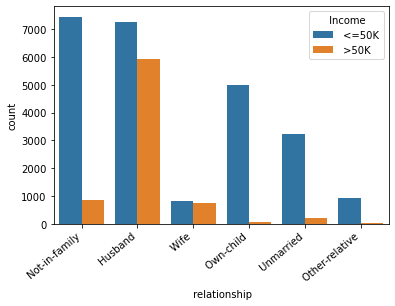

<Figure size 1080x504 with 0 Axes>

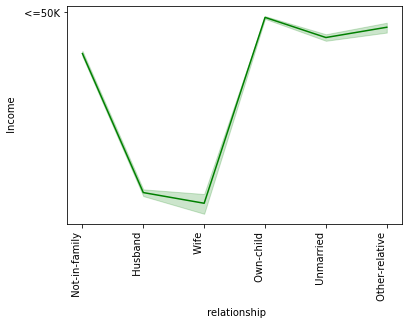

<Figure size 1080x504 with 0 Axes>

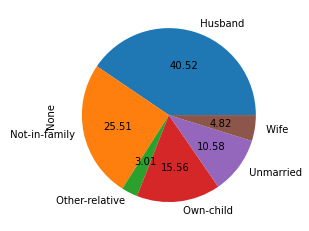

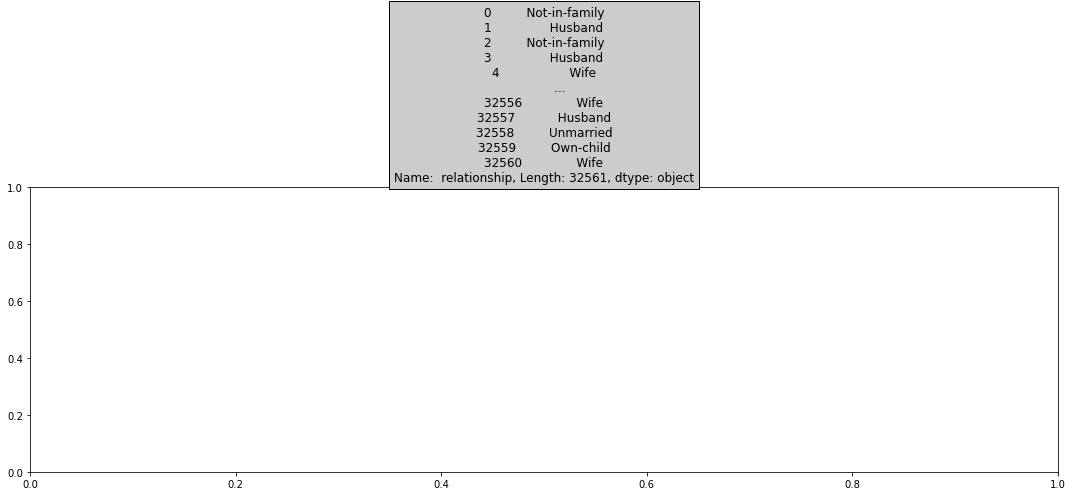

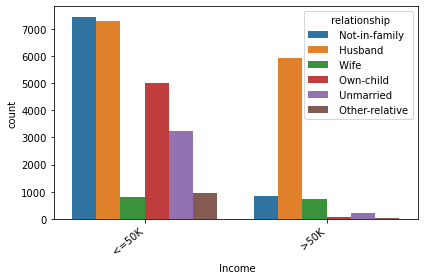



---------  race vs Income---------------------------------------------------------------------------------


 race
 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name:  race, dtype: int64




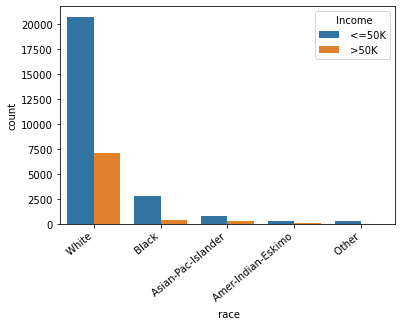

<Figure size 1080x504 with 0 Axes>

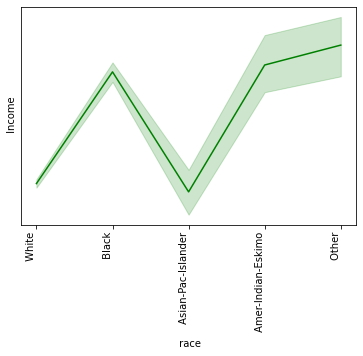

<Figure size 1080x504 with 0 Axes>

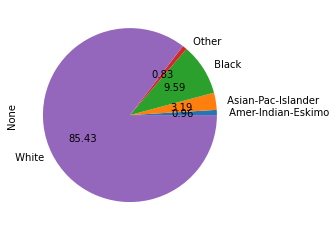

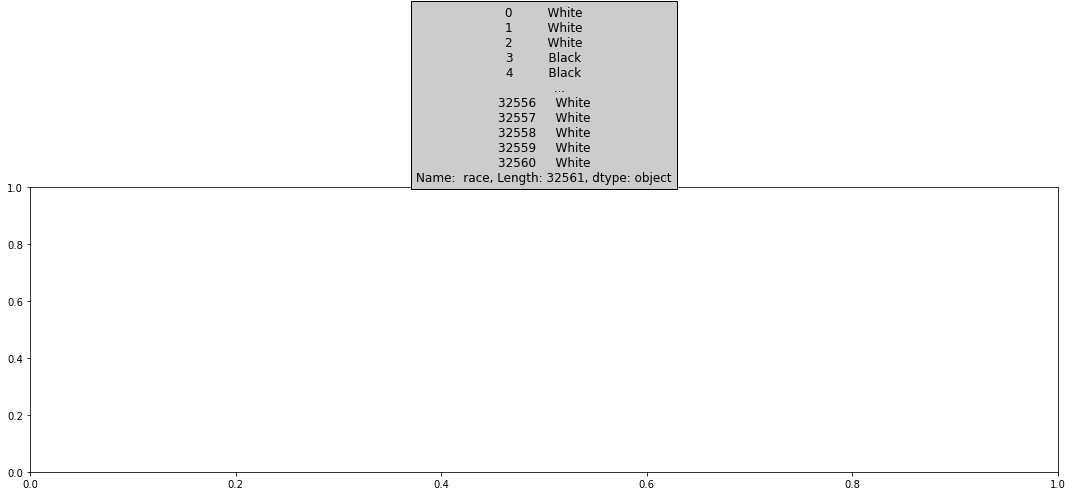

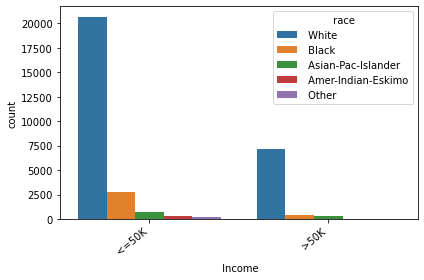



---------  sex vs Income---------------------------------------------------------------------------------


 sex
 Male      21790
 Female    10771
Name:  sex, dtype: int64




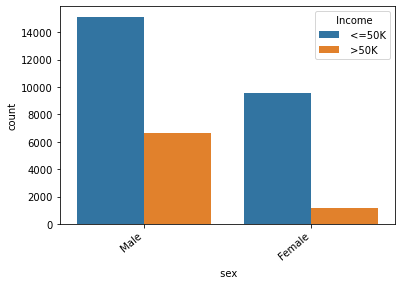

<Figure size 1080x504 with 0 Axes>

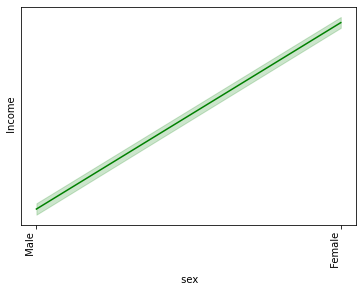

<Figure size 1080x504 with 0 Axes>

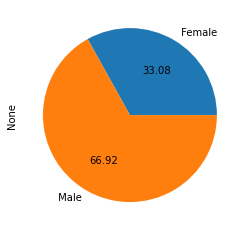

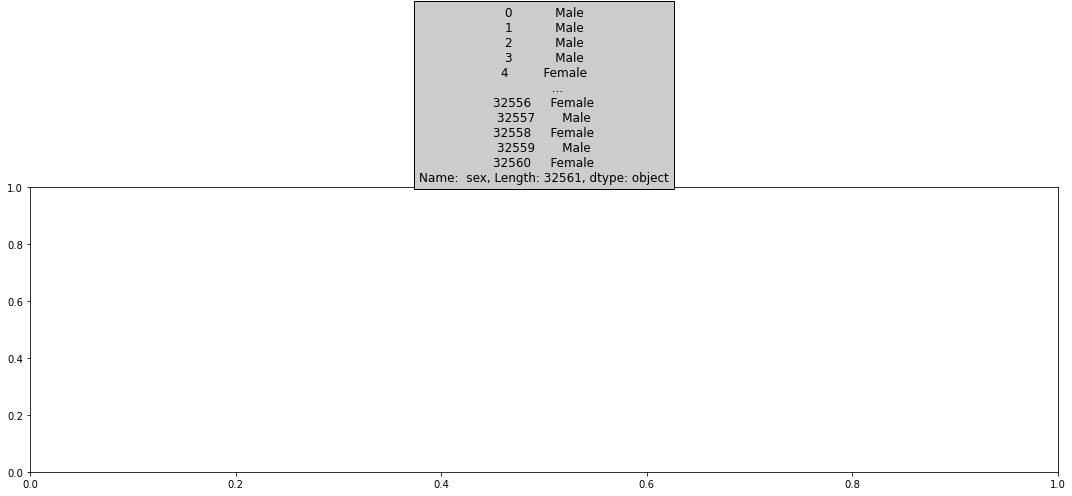

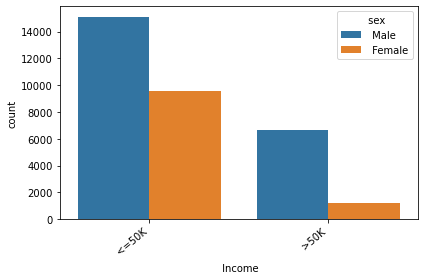



---------  native-country vs Income---------------------------------------------------------------------------------


 native-country
 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran       

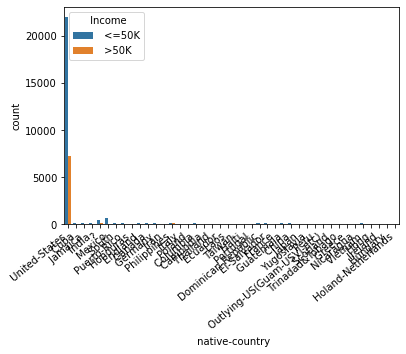

<Figure size 1080x504 with 0 Axes>

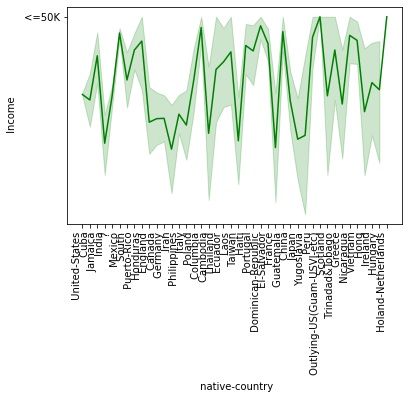

<Figure size 1080x504 with 0 Axes>

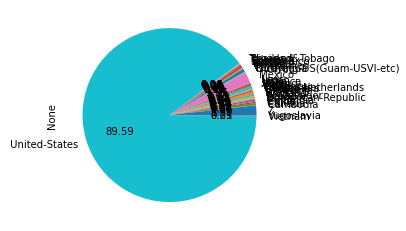

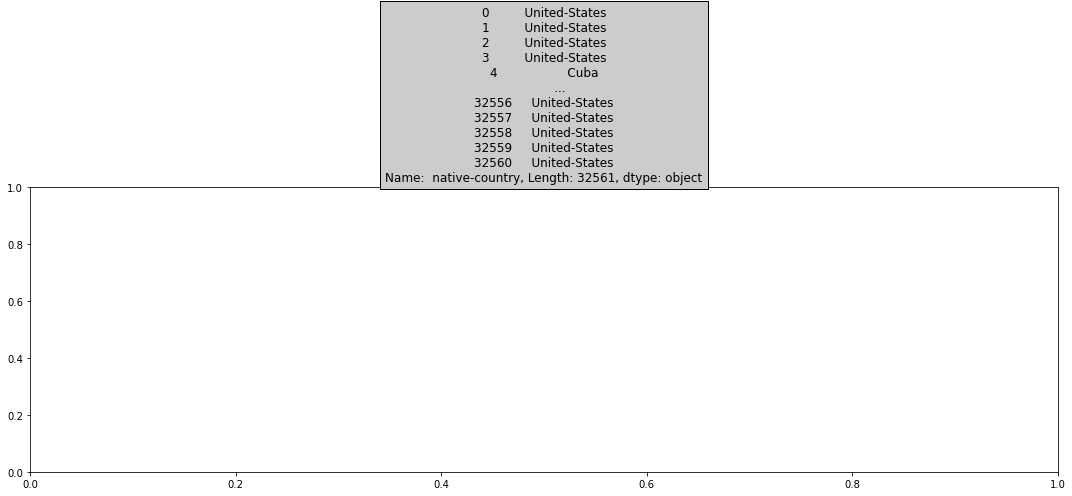

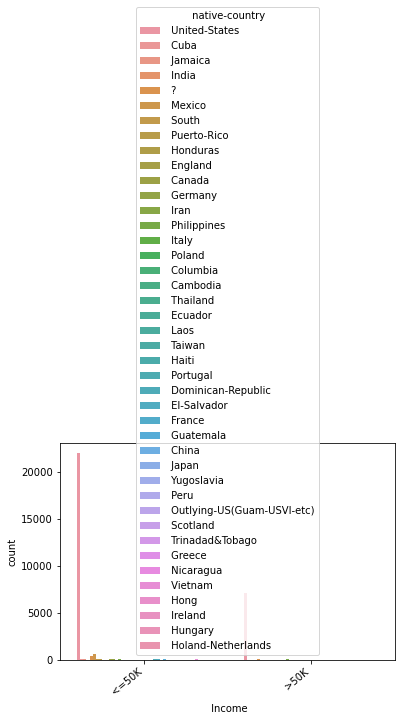

In [12]:
def relationwithlabel(x):
    print(x.value_counts())
    print("\n")
    
    #countplot with hue label
    ax=sns.countplot(x=x, hue=' Income',data = df)
    plt.figure(figsize=(15,7))
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right")
    plt.tight_layout()
    plt.show()
    
    ay=sns.lineplot(x=x,y=" Income",data=df, color='green')
    plt.figure(figsize=(15,7))
    ay.set_xticklabels(ax.get_xticklabels(), rotation = 90, ha = "right")
    plt.tight_layout()
    plt.show()
    
    
    df.groupby(x).size().plot(kind='pie', autopct='%1.2f')
    plt.figure(figsize=(15,7))
    plt.title(str(x),bbox={'facecolor':'0.8', 'pad':5})
    plt.tight_layout()
    plt.show()
    
    az=sns.countplot(x=' Income',hue=x,data=df)
    az.set_xticklabels(az.get_xticklabels(), rotation = 40, ha = "right")
    plt.tight_layout()
    plt.show()



for column_name in categorical_columns:
    print("---------",column_name,"vs Income---------------------------------------------------------------------------------")
    print("\n")
    print(str(column_name))
    relationwithlabel(df[str(column_name)])
    print("\n")

In [13]:
numerical_columns=df[{'age',' fnlwgt',' education-num',' capital-gain', ' capital-loss', ' hours-per-week'}]

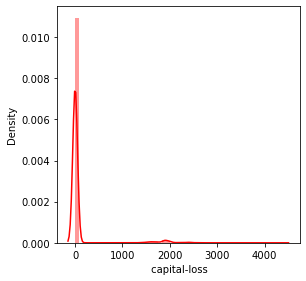

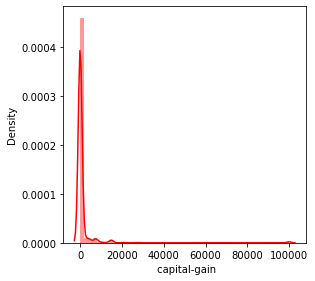

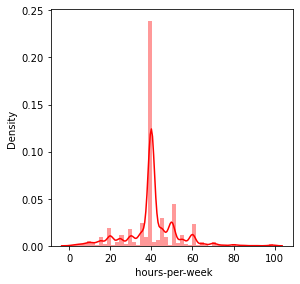

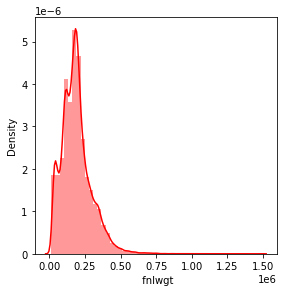

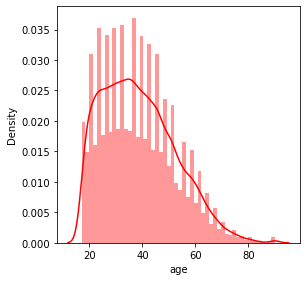

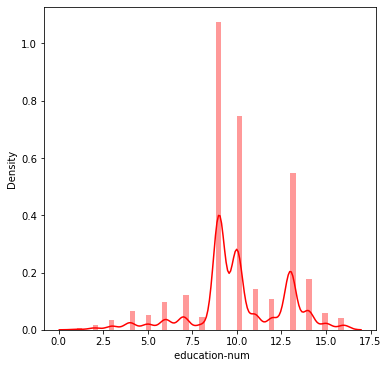

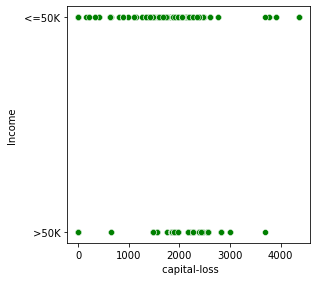

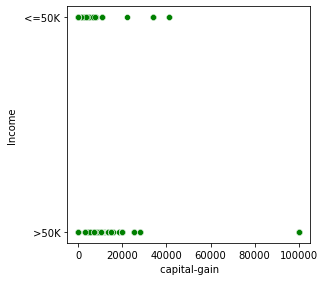

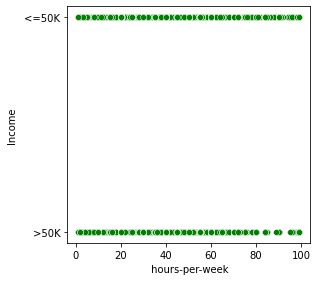

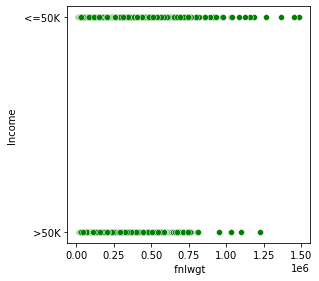

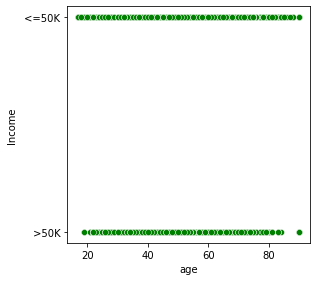

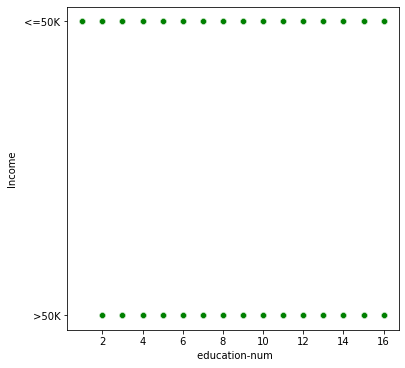

array([[<AxesSubplot:title={'center':' capital-loss'}>,
        <AxesSubplot:title={'center':' capital-gain'}>],
       [<AxesSubplot:title={'center':' hours-per-week'}>,
        <AxesSubplot:title={'center':' fnlwgt'}>],
       [<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':' education-num'}>]], dtype=object)

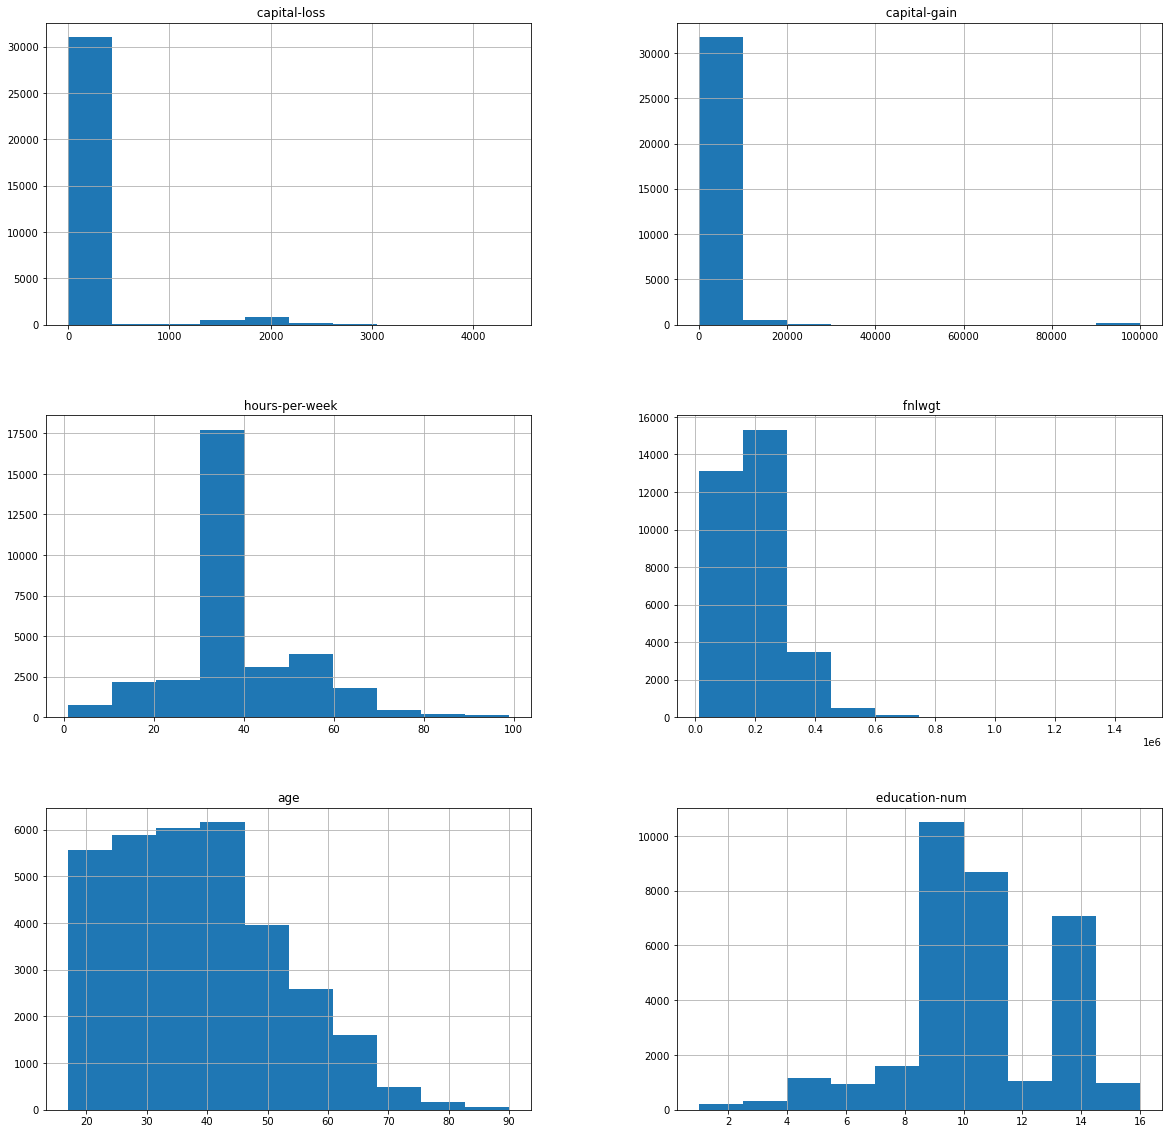

In [14]:
# Displacement plot with label data
subplot= 1
for columns in numerical_columns:
    if subplot<16:
        plt.figure(figsize=(20,20))
        ax=plt.subplot(4,4,subplot)
        sns.distplot(x=numerical_columns[columns], color= 'red')
        plt.xlabel(columns)
    subplot=+1
plt.tight_layout()
plt.show()
#Scatterplot with numerical data
subplot= 1
for columns in numerical_columns:
    if subplot<16:
        plt.figure(figsize=(20,20))
        ax=plt.subplot(4,4,subplot)
        sns.scatterplot(x=numerical_columns[columns],y= df[' Income'], color= 'green')
        plt.xlabel(columns)
        plt.ylabel('Income')
    subplot=+1
plt.tight_layout()
plt.show()
#Histogram plot of the Numerical data
numerical_columns.hist(figsize=(20,20))

In [15]:
numerical_columns.head()

,capital-loss,capital-gain,hours-per-week,fnlwgt,age,education-num
0,0,2174,40,77516,39,13
1,0,0,13,83311,50,13
2,0,0,40,215646,38,9
3,0,0,40,234721,53,7
4,0,0,40,338409,28,13


# Converstion of Catagorical data into Numerical Data

In [16]:
categorical_column.head()

,occupation,native-country,education,workclass,sex,relationship,race,marital-status
0,Adm-clerical,United-States,Bachelors,State-gov,Male,Not-in-family,White,Never-married
1,Exec-managerial,United-States,Bachelors,Self-emp-not-inc,Male,Husband,White,Married-civ-spouse
2,Handlers-cleaners,United-States,HS-grad,Private,Male,Not-in-family,White,Divorced
3,Handlers-cleaners,United-States,11th,Private,Male,Husband,Black,Married-civ-spouse
4,Prof-specialty,Cuba,Bachelors,Private,Female,Wife,Black,Married-civ-spouse


In [17]:
df[' race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name:  race, dtype: int64

In [18]:
df[' occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name:  occupation, dtype: int64

In [19]:
df[' occupation']=df[' occupation'].str.replace('?','Sales')

In [20]:
df[' occupation'].value_counts()

 Sales                5493
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name:  occupation, dtype: int64

In [21]:
df[' workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name:  workclass, dtype: int64

In [22]:
df[' workclass']=df[' workclass'].str.replace('?','State-gov')

In [23]:
df[' workclass'].value_counts()

 Private             22696
 State-gov            3134
 Self-emp-not-inc     2541
 Local-gov            2093
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name:  workclass, dtype: int64

In [24]:
df[' sex'].value_counts()

 Male      21790
 Female    10771
Name:  sex, dtype: int64

In [25]:
df[' marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name:  marital-status, dtype: int64

In [26]:
df[' marital-status']=df[' marital-status'].replace([' Married-civ-spouse', ' Married-AF-spouse'], 'married')

In [27]:
df[' marital-status'].value_counts()

married                   14999
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
Name:  marital-status, dtype: int64

In [28]:
df[' education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name:  education, dtype: int64

In [29]:
df[' education']=df[' education'].replace([' Preschool',' 5th-6th',' 1st-4th',' 7th-8th',' 9th',' 10th', ' Prof-school',' HS-grad'],' School')
df[' education']=df[' education'].replace([' Some-college',' Bachelors',' Assoc-voc', ' 11th', ' Assoc-acdm',' 12th'], ' College')

In [30]:
df[' education'].value_counts()

 College      16703
 School       13722
 Masters       1723
 Doctorate      413
Name:  education, dtype: int64

In [31]:
df[' relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name:  relationship, dtype: int64

In [32]:
df[' native-country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [33]:
df[' native-country']= df[' native-country'].replace([' ?'],'United-States')

In [34]:
df[' native-country'].value_counts()

 United-States                 29170
 Mexico                          643
United-States                    583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [35]:
df[' native-country']= df[' native-country'].replace(['United-States'],' United-States')

In [36]:
df[' native-country'].value_counts()

 United-States                 29753
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

In [37]:
df[' Income'].value_counts()

 <=50K    24720
 >50K      7841
Name:  Income, dtype: int64

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
lb= LabelEncoder()

In [40]:
categorical_column.columns

Index([' occupation', ' native-country', ' education', ' workclass', ' sex',
       ' relationship', ' race', ' marital-status'],
      dtype='object')

In [41]:
df[' education']=lb.fit_transform(df[' education'])
df[' relationship']=lb.fit_transform(df[' relationship'])
df[' sex']=lb.fit_transform(df[' sex'])
df[' race']=lb.fit_transform(df[' race'])
df[' occupation']=lb.fit_transform(df[' occupation'])
df[' marital-status']=lb.fit_transform(df[' marital-status'])
df[' workclass']=lb.fit_transform(df[' workclass'])
df[' native-country']=lb.fit_transform(df[' native-country'])
df[' Income']=lb.fit_transform(df[' Income'])

In [42]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,6,77516,0,13,2,0,1,4,1,2174,0,40,38,0
1,50,5,83311,0,13,5,3,0,4,1,0,0,13,38,0
2,38,3,215646,3,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,0,7,5,5,0,2,1,0,0,40,38,0
4,28,3,338409,0,13,5,9,5,2,0,0,0,40,4,0


In [43]:
x= df.drop(' Income',axis=1)
x

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,6,77516,0,13,2,0,1,4,1,2174,0,40,38
1,50,5,83311,0,13,5,3,0,4,1,0,0,13,38
2,38,3,215646,3,9,0,5,1,4,1,0,0,40,38
3,53,3,234721,0,7,5,5,0,2,1,0,0,40,38
4,28,3,338409,0,13,5,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,257302,0,12,5,12,5,4,0,0,0,38,38
32557,40,3,154374,3,9,5,6,0,4,1,0,0,40,38
32558,58,3,151910,3,9,4,0,4,4,0,0,0,40,38
32559,22,3,201490,3,9,2,0,3,4,1,0,0,20,38


In [44]:
y= df[' Income']
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name:  Income, Length: 32561, dtype: int32

# Feature Importance

In [45]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

,Importance
Features,
marital-status,0.205
fnlwgt,0.191
education-num,0.125
age,0.122
capital-gain,0.101
hours-per-week,0.071
occupation,0.060
capital-loss,0.036
workclass,0.035


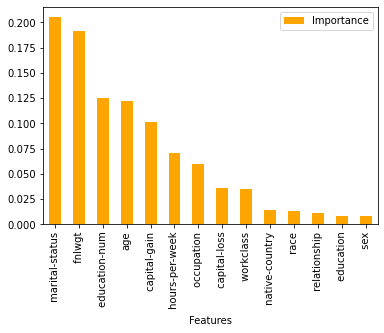

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=21)
knn= KNeighborsRegressor()
knn.fit(x_train,y_train)
y_predict=knn.predict(x_test)
rf= RandomForestRegressor()
rf.fit(x_train,y_train)
y_rf=rf.predict(x_test)
importance=pd.DataFrame({'Features':x.columns, 'Importance':np.round(rf.feature_importances_,3)})
importance=importance.sort_values('Importance', ascending= False).set_index('Features')
importance.plot.bar(color='orange')
importance

# Correlation of features

In [47]:
df_corr=df.corr()

<AxesSubplot:>

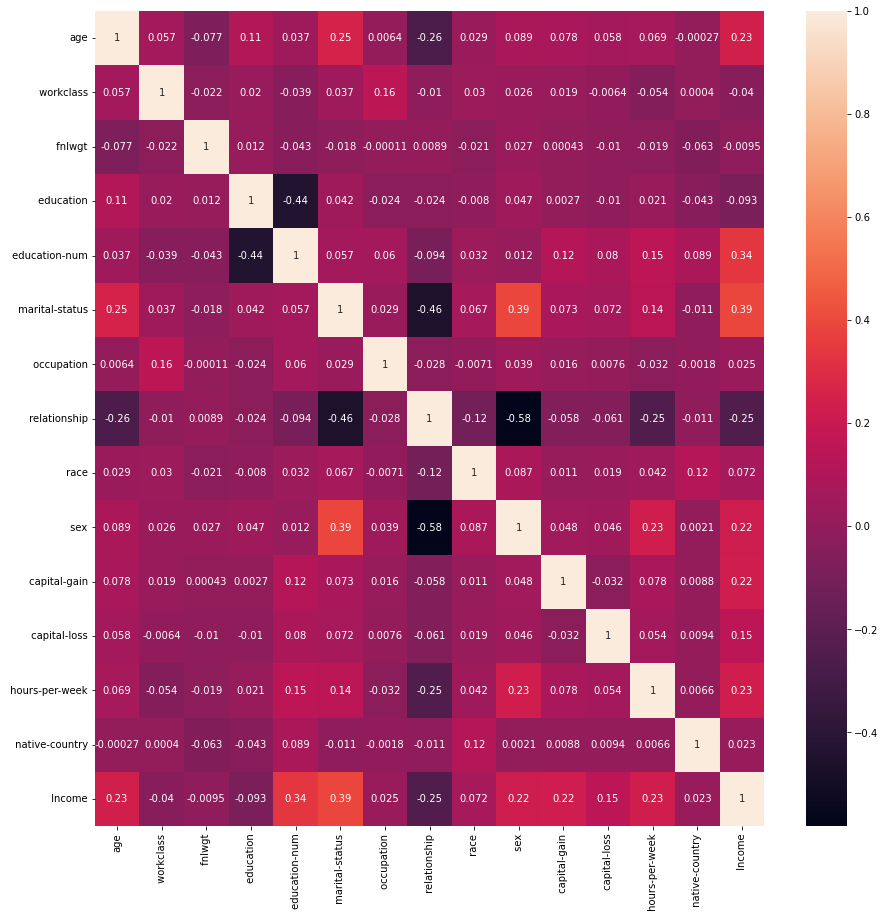

In [48]:
plt.figure(figsize=(15,15))
sns.heatmap(df_corr,annot=True)

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, MinMaxScaler
scaler=StandardScaler()
x_scaler=scaler.fit_transform(numerical_columns)

vif=pd.DataFrame()
vif["quality"]=[variance_inflation_factor(x_scaler,i) for i in range(x_scaler.shape[1])]
vif["feature"]=numerical_columns.columns
vif

,quality,feature
0,1.013466,capital-loss
1,1.026702,capital-gain
2,1.031912,hours-per-week
3,1.007771,fnlwgt
4,1.019323,age
5,1.043670,education-num


# Outliears

In [50]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,0.030671,2.115748,1.063611,0.953067,1.134739,0.640420,1.532485,0.277805,0.393668,0.703071,0.148453,0.21666,0.035429,0.26137,0.563199
1,0.837109,1.342562,1.008707,0.953067,1.134739,0.975902,0.797122,0.900181,0.393668,0.703071,0.145920,0.21666,2.222153,0.26137,0.563199
2,0.042642,0.203810,0.245079,1.114639,0.420060,1.717967,0.306881,0.277805,0.393668,0.703071,0.145920,0.21666,0.035429,0.26137,0.563199
3,1.057047,0.203810,0.425801,0.953067,1.197459,0.975902,0.306881,0.900181,1.962621,0.703071,0.145920,0.21666,0.035429,0.26137,0.563199
4,0.775768,0.203810,1.408176,0.953067,1.134739,0.975902,0.673602,2.211698,1.962621,1.422331,0.145920,0.21666,0.035429,5.35294,0.563199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.849080,0.203810,0.639741,0.953067,0.746039,0.975902,1.408964,2.211698,0.393668,1.422331,0.145920,0.21666,0.197409,0.26137,0.563199
32557,0.103983,0.203810,0.335433,1.114639,0.420060,0.975902,0.061760,0.900181,0.393668,0.703071,0.145920,0.21666,0.035429,0.26137,1.775573
32558,1.423610,0.203810,0.358777,1.114639,0.420060,0.437128,1.532485,1.589322,0.393668,1.422331,0.145920,0.21666,0.035429,0.26137,0.563199
32559,1.215643,0.203810,0.110960,1.114639,0.420060,0.640420,1.532485,0.966947,0.393668,0.703071,0.145920,0.21666,1.655225,0.26137,0.563199


In [51]:
df_z=df[(z<3).all(axis= 1)]
df_z

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,6,77516,0,13,2,0,1,4,1,2174,0,40,38,0
1,50,5,83311,0,13,5,3,0,4,1,0,0,13,38,0
2,38,3,215646,3,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,0,7,5,5,0,2,1,0,0,40,38,0
5,37,3,284582,2,14,5,3,5,4,0,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,257302,0,12,5,12,5,4,0,0,0,38,38,0
32557,40,3,154374,3,9,5,6,0,4,1,0,0,40,38,1
32558,58,3,151910,3,9,4,0,4,4,0,0,0,40,38,0
32559,22,3,201490,3,9,2,0,3,4,1,0,0,20,38,0


In [52]:
print(df.shape)
print(df_z.shape)
print("percentage of data loss",((df.shape[0]-df_z.shape[0])/df.shape[0])*100)

(32561, 15)
(27784, 15)
percentage of data loss 14.67092534013083


In [53]:
df.skew()

age                 0.558743
 workclass          0.292711
 fnlwgt             1.446980
 education          0.143370
 education-num     -0.311676
 marital-status    -0.368459
 occupation        -0.006506
 relationship       0.786818
 race              -2.435386
 sex               -0.719293
 capital-gain      11.953848
 capital-loss       4.594629
 hours-per-week     0.227643
 native-country    -4.243158
 Income             1.212430
dtype: float64

In [54]:
df[' capital-gain']=np.sqrt(df[' capital-gain'])
df[' capital-loss']=np.sqrt(df[' capital-loss'])

In [55]:
df.skew()

age                0.558743
 workclass         0.292711
 fnlwgt            1.446980
 education         0.143370
 education-num    -0.311676
 marital-status   -0.368459
 occupation       -0.006506
 relationship      0.786818
 race             -2.435386
 sex              -0.719293
 capital-gain      5.894582
 capital-loss      4.376357
 hours-per-week    0.227643
 native-country   -4.243158
 Income            1.212430
dtype: float64

In [56]:
df_z

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,6,77516,0,13,2,0,1,4,1,2174,0,40,38,0
1,50,5,83311,0,13,5,3,0,4,1,0,0,13,38,0
2,38,3,215646,3,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,0,7,5,5,0,2,1,0,0,40,38,0
5,37,3,284582,2,14,5,3,5,4,0,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,257302,0,12,5,12,5,4,0,0,0,38,38,0
32557,40,3,154374,3,9,5,6,0,4,1,0,0,40,38,1
32558,58,3,151910,3,9,4,0,4,4,0,0,0,40,38,0
32559,22,3,201490,3,9,2,0,3,4,1,0,0,20,38,0


In [57]:
from imblearn.over_sampling import SMOTE

In [58]:
smote=SMOTE()

In [59]:
x_train_SMOTE,y_train_SMOTE=smote.fit_resample(x_train,y_train)

In [60]:
x_train_SMOTE.shape, y_train_SMOTE.shape, x_test.shape, y_test.shape

((34662, 14), (34662,), (9769, 14), (9769,))

In [61]:
print(y_train_SMOTE)
print(x_train_SMOTE)

0        0
1        0
2        0
3        0
4        0
        ..
34657    1
34658    1
34659    1
34660    1
34661    1
Name:  Income, Length: 34662, dtype: int32
       age   workclass   fnlwgt   education   education-num   marital-status  \
0       33           3   119409           3               9                5   
1       21           3   202570           0               8                2   
2       37           3   267085           0              10                5   
3       31           3    73585           0              11                5   
4       19           3   302945           0              10                2   
...    ...         ...      ...         ...             ...              ...   
34657   52           3   174766           0               9                5   
34658   60           5    67776           0              11                2   
34659   32           4   260764           2               9                5   
34660   35           2   139867     

# Best Random state

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train, x_test,y_train, y_test=train_test_split(x,y,test_size=.25,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i

print("Best accuracy is", maxAccu,"on Random State",maxRS)

Best accuracy is 0.8124309052941899 on Random State 131


# ML Algorithms 

In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score,roc_curve,auc

In [78]:
KNN=KNeighborsClassifier(n_neighbors=6)
DT=DecisionTreeClassifier(random_state=6)
#XGB=XGBClassifier()
RF=RandomForestClassifier()
ADA=AdaBoostClassifier()
MNB=MultinomialNB()
GBC=GradientBoostingClassifier()
BC=BaggingClassifier()
ETC=ExtraTreesClassifier()
LR=LogisticRegression()

models= []
models.append(('KNeighborsClassifier', KNN))
models.append(('DecisionTreeClassifier', DT))
#models.append(('XGBClassifier', XGB))
models.append(('RandomForestClassifier', RF))
models.append(('AdaBoostClassifier', ADA))
models.append(('MultinomialNB', MNB))
models.append(('GradientBoostingClassifier', GBC))
models.append(('BaggingClassifier', BC))
models.append(('ExtraTreesClassifier', ETC))
models.append(('LogisticRegression', LR))

****************************************** KNeighborsClassifier ********************************************************


KNeighborsClassifier(n_neighbors=6)


Accuracy_score =  0.7768087458543177


Cross_Val_Score =  0.7785288132527396


roc_auc_score =  0.7386403486779


classification_report
               precision    recall  f1-score   support

           0       0.88      0.81      0.85      6121
           1       0.54      0.66      0.60      2020

    accuracy                           0.78      8141
   macro avg       0.71      0.74      0.72      8141
weighted avg       0.80      0.78      0.78      8141



[[4985 1136]
 [ 681 1339]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



****************************************** DecisionTreeClassifier ********************************************************


DecisionTreeClassifier(random_state=6)


Accuracy_score =  0.9385824837243582


Cross_Val_Score =  0.8016207172035393


roc_auc_score =  0.9276476373335749


classification_

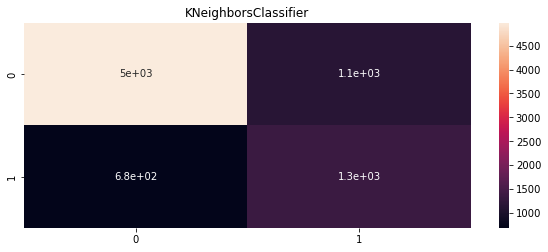

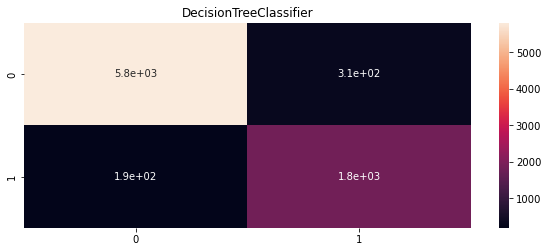

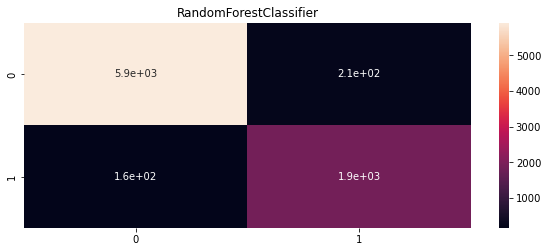

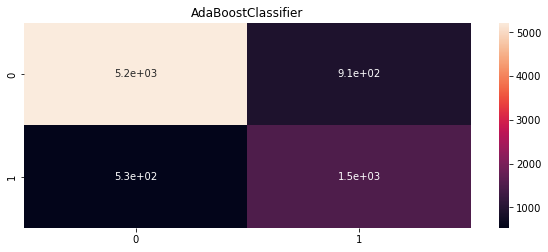

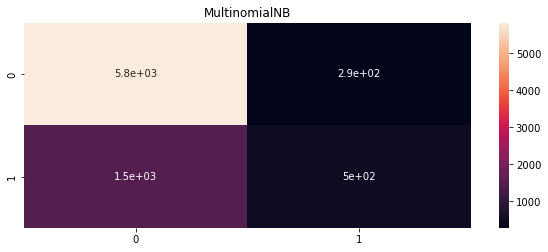

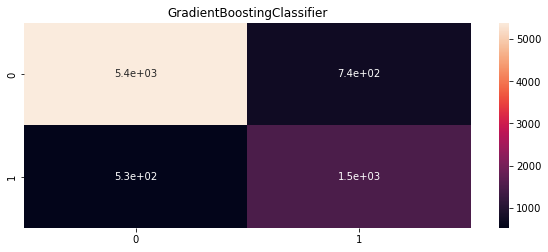

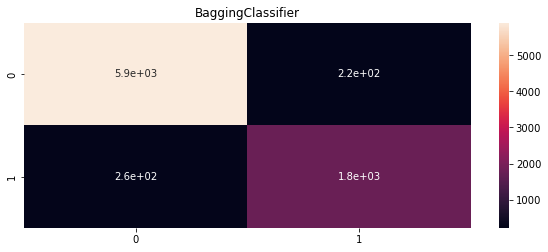

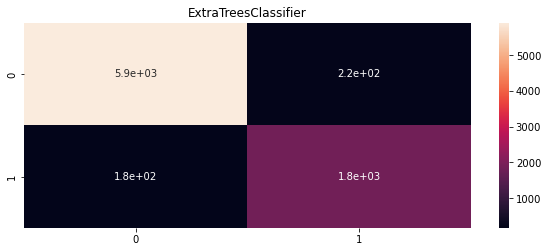

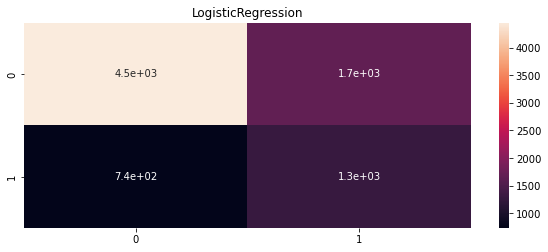

In [79]:
Model= []
score= []
cvs=[]
rocscore=[]
difference=[]
for name,model in models:
    print('******************************************',name,'********************************************************')
    print('\n')
    Model.append(name)
    model.fit(x_train_SMOTE,y_train_SMOTE)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    
    sc= cross_val_score(model, x_test,y_test, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    
    false_positive_rate, true_positive_rate,thresolds= roc_curve(y_test,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score = ', roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    print('\n\n')
    diff=AS-sc
    difference.append(diff)

In [80]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score,'Cross_val_score': cvs,'difference between a and c':difference,'roc_score':rocscore})
result

,Model,Accuracy_score,Cross_val_score,difference between a and c,roc_score
0,KNeighborsClassifier,77.680875,77.852881,-0.001720,73.864035
1,DecisionTreeClassifier,93.858248,80.162072,0.136962,92.764764
2,RandomForestClassifier,95.491954,85.480759,0.100112,94.365288
3,AdaBoostClassifier,82.299472,85.689604,-0.033901,79.373258
4,MultinomialNB,77.815993,77.791547,0.000244,60.089770
5,GradientBoostingClassifier,84.485935,86.389774,-0.019038,80.926772
6,BaggingClassifier,94.091635,84.006708,0.100849,91.792264
7,ExtraTreesClassifier,95.172583,84.301382,0.108712,93.887562
8,LogisticRegression,70.433608,78.589922,-0.081563,68.099280


# ROC AUC curve

AxesSubplot(0.125,0.808774;0.62x0.0712264)



AxesSubplot(0.125,0.808774;0.62x0.0712264)



AxesSubplot(0.125,0.808774;0.62x0.0712264)



AxesSubplot(0.125,0.808774;0.62x0.0712264)



AxesSubplot(0.125,0.808774;0.62x0.0712264)



AxesSubplot(0.125,0.808774;0.62x0.0712264)



AxesSubplot(0.125,0.808774;0.62x0.0712264)



AxesSubplot(0.125,0.808774;0.62x0.0712264)



AxesSubplot(0.125,0.808774;0.62x0.0712264)





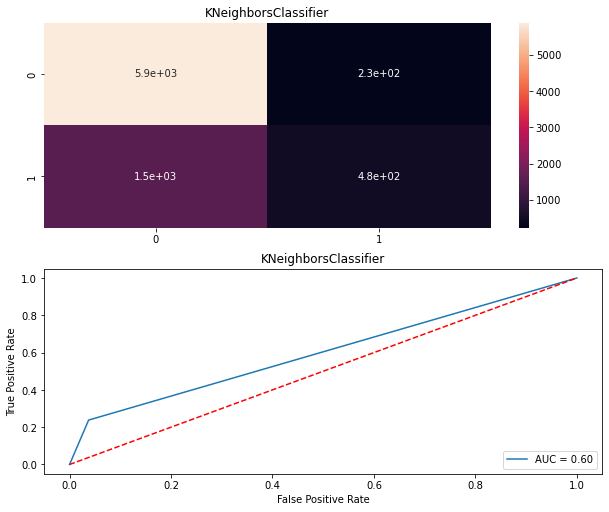

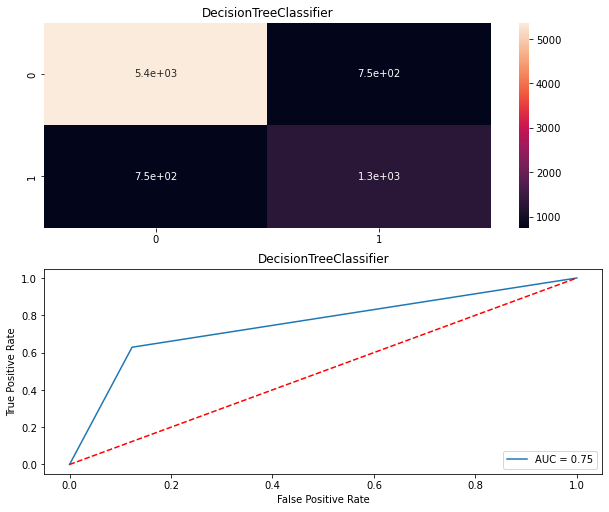

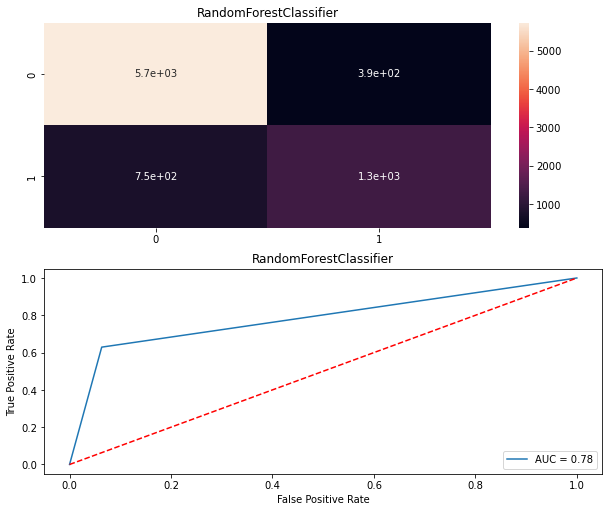

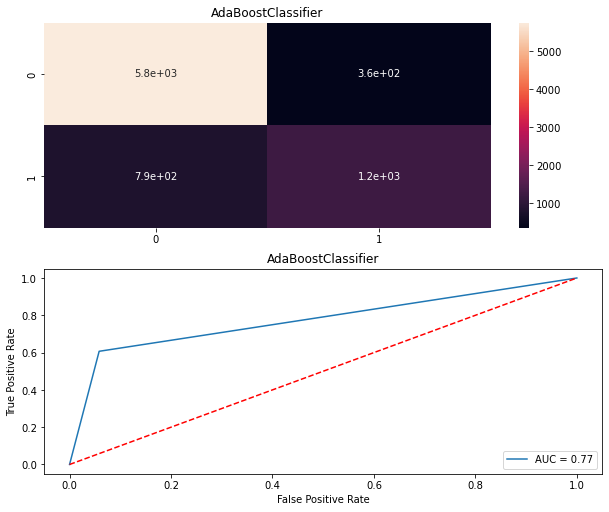

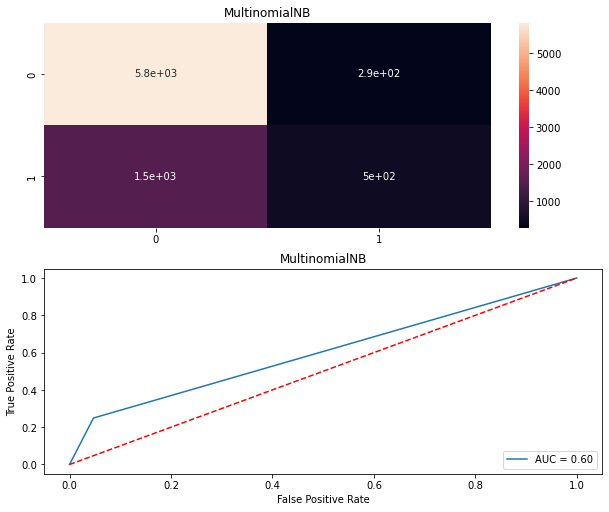

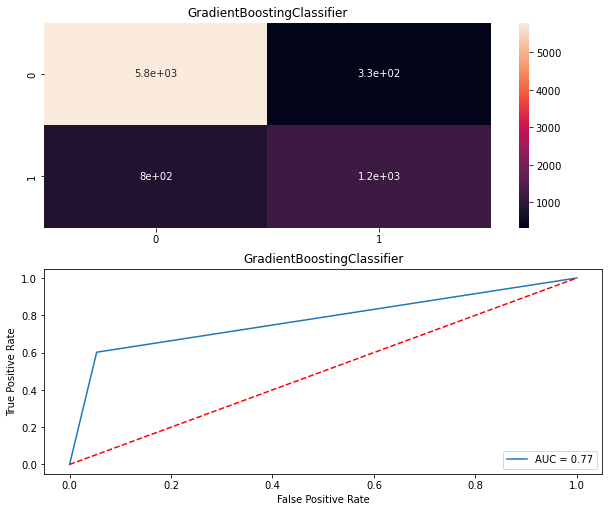

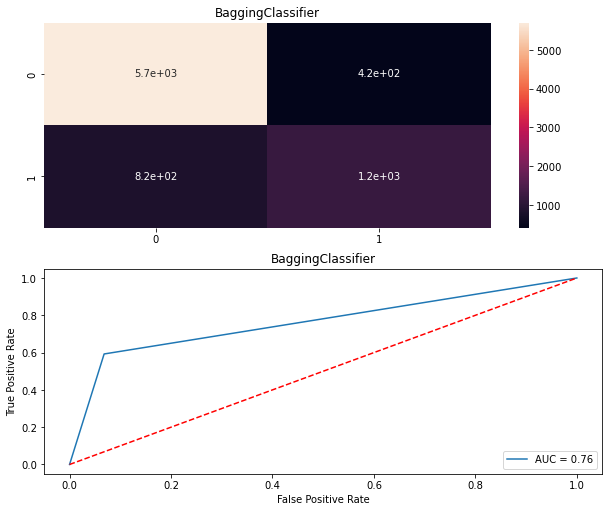

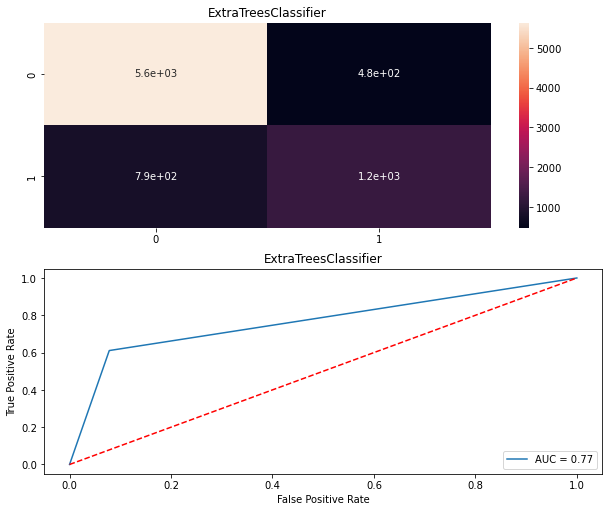

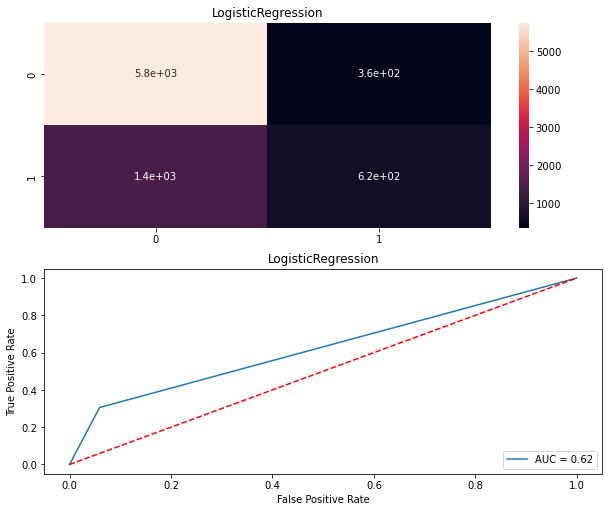

In [81]:
for name,model in models:
    model.fit(x_train,y_train)
    pre=model.predict(x_test)

    false_positive_rate, true_positive_rate,thresolds= roc_curve(y_test,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    
    cm= confusion_matrix(y_test,pre)
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

# Hyper Tuning Parameters 

In [88]:
from sklearn.model_selection import GridSearchCV

fmod_param = {'base_score':[0.5,1,1.5,2], 'colsample_bylevel':[1,1.25,1.5,2],'colsample_bytree':[1,2,3],
       'gamma':[0,1,2,3], 'learning_rate':[0.1,0.5,1,1.5,2]}
             
GSCV = GridSearchCV(XGBClassifier(), fmod_param, cv=5)
GSCV.fit(x_train,y_train)
GSCV.best_params_

{'base_score': 0.5,
 'colsample_bylevel': 1,
 'colsample_bytree': 1,
 'gamma': 3,
 'learning_rate': 0.1}

In [89]:
Final_model=XGBClassifier(base_score=0.5,colsample_bylevel=1,colsample_bytree= 1,gamma= 3,learning_rate= 0.1)

In [90]:
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
print(accuracy_score(y_test,pred)*100)

87.38484215698317


AxesSubplot(0.125,0.808774;0.62x0.0712264)





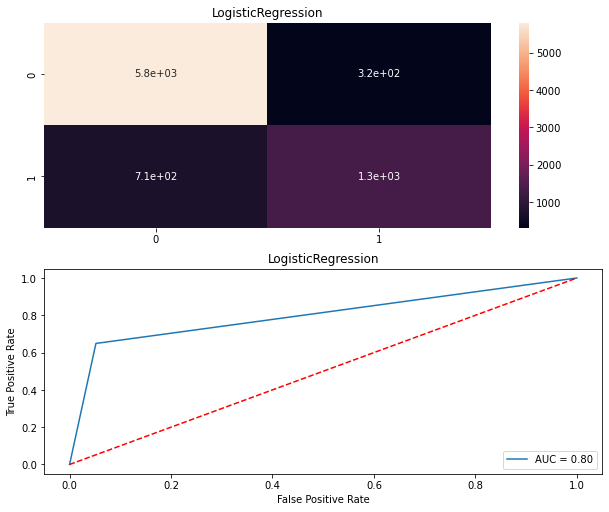

In [93]:
Final_model.fit(x_train,y_train)
pre=Final_model.predict(x_test)

false_positive_rate, true_positive_rate,thresolds= roc_curve(y_test,pre)
roc_auc=auc(false_positive_rate,true_positive_rate)

cm= confusion_matrix(y_test,pre)
plt.figure(figsize=(10,40))
plt.subplot(911)
plt.title(name)
print(sns.heatmap(cm,annot=True))
plt.subplot(912)
plt.title(name)
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
print('\n\n')

In [95]:
score_final_model=[]
cvs_final_model=[]
rocscore_final_model=[]

pre=Final_model.predict(x_test)

AS=accuracy_score(y_test,pre)
score_final_model.append(AS*100)


sc= cross_val_score(Final_model, x_test,y_test, cv=10, scoring='accuracy').mean()
cvs_final_model.append(sc*100)


false_positive_rate, true_positive_rate,thresolds= roc_curve(y_test,pre)
roc_auc=auc(false_positive_rate,true_positive_rate)
rocscore_final_model.append(roc_auc*100)


print('classification_report\n',classification_report(y_test,pre))
print('\n')

print("Score of the finalized model:")
final_model_scores=data = pd.DataFrame({'Accuracy score':score_final_model,'cross validation score':cvs_final_model,'ROC Score':rocscore_final_model})
final_model_scores

classification_report
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      6121
           1       0.80      0.65      0.72      2020

    accuracy                           0.87      8141
   macro avg       0.85      0.80      0.82      8141
weighted avg       0.87      0.87      0.87      8141



Score of the finalized model:


,Accuracy score,cross validation score,ROC Score
0,87.384842,86.881129,79.85288


# Saving the model

In [97]:
import pickle
model_file_path='FinalModel_census_income.pkl'
pickle.dump(Final_model, open(model_file_path, 'wb'))